d:\Anaconda\envs\ml_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading PhreshPhish dataset...

✅ Dataset loaded successfully!
Available splits: dict_keys(['train', 'test'])

DATASET SIZE
📊 Train set size: 371,941 samples
📊 Test set size: 36,787 samples
📊 Total samples: 408,728

⚠️ Dataset is HUGE (>100GB with HTML). Using 5000 samples for EDA...
Working with 10,000 train samples and 10,000 test samples

DATASET STRUCTURE

🔍 Column names:
['sha256', 'url', 'label', 'target', 'date', 'lang', 'lang_score', 'html']

🔍 Data types:
sha256         object
url            object
label          object
target         object
date           object
lang           object
lang_score    float64
html           object
dtype: object

🔍 Dataset shape (rows, columns):
Train sample: (10000, 8)
Test sample: (10000, 8)

SAMPLE DATA (First 3 rows, excluding HTML)
                                              sha256  \
0  9aca4a5e5fd7b781005a913d6a94d35d366962b14275a0...   
1  84fb791a4a3ef0f0abcba9e60aa27fb8a2a03b15d99ee7...   
2  c7a7003c6bed8fc95d3b84f408fd4902ee8c54db861

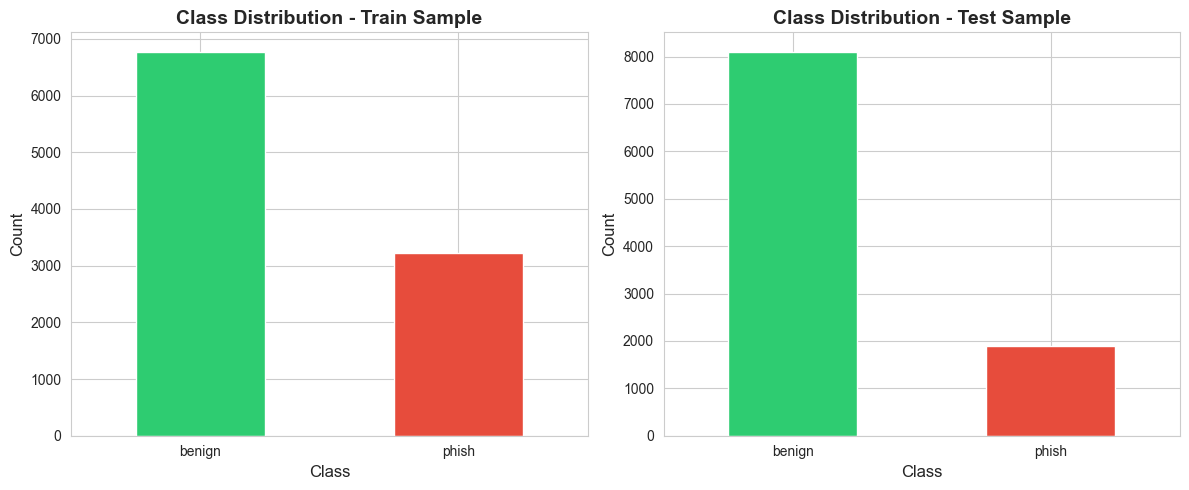


MISSING VALUES ANALYSIS

📋 Missing values in TRAIN sample:
target    6777
dtype: int64

📊 Missing value percentages:
target    67.77
dtype: float64

📋 Missing values in TEST sample:
target    8105
dtype: int64

DUPLICATE ANALYSIS

🔍 Duplicate rows in TRAIN sample: 0
🔍 Duplicate rows in TEST sample: 0

NUMERICAL STATISTICS
         lang_score
count  10000.000000
mean       0.778015
std        0.190648
min       -1.000000
25%        0.706000
50%        0.833000
75%        0.904000
max        1.000000

COLUMN DETAILS (excluding HTML)

📝 Column: sha256
   Type: object
   Unique values: 10,000
   Sample values:
      1. 9aca4a5e5fd7b781005a913d6a94d35d366962b14275a0217bcb784102327785
      2. 84fb791a4a3ef0f0abcba9e60aa27fb8a2a03b15d99ee7693bf7de74a62514c6
      3. c7a7003c6bed8fc95d3b84f408fd4902ee8c54db8615fa561f15208a1d44ce6e

📝 Column: url
   Type: object
   Unique values: 10,000
   Sample values:
      1. https://conisbseproszlogin.gitbook.io/us
      2. https://rakeshpandey12.github.

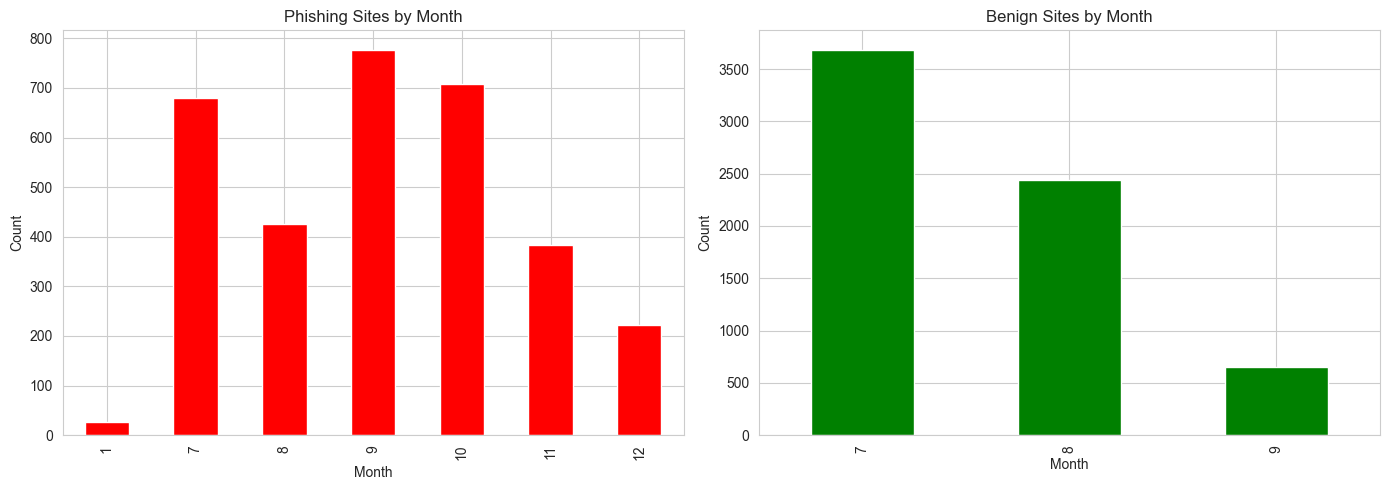


EDA SUMMARY

✅ Dataset loaded successfully
📊 Full dataset size: 408,728 samples
📊 Working with: 20,000 samples for EDA
📋 Features: 9
🎯 Target column: label
⚠️ Missing values: Yes
🔄 Duplicates: No
💾 HTML column: ~265 KB per sample (HUGE!)


🎯 KEY FINDINGS:
1. Dataset contains URLs + full HTML snapshots
2. HTML is massive - we'll need to extract features, not use raw HTML
3. Need to parse URLs and extract meaningful features

🎯 NEXT STEPS:
1. Plan URL-based feature engineering (domain, path, parameters, etc.)
2. Plan HTML-based feature extraction (title, links, forms, scripts)
3. Decide: Do we need the HTML at all, or just URL features?


In [1]:
# ============================================
# STEP 1: LOAD THE DATASET
# ============================================

import os
os.environ['HF_HOME'] = 'E:/.cache/huggingface'

from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Loading PhreshPhish dataset...")
dataset = load_dataset("phreshphish/phreshphish", cache_dir='E:/.cache/huggingface')

print("\n✅ Dataset loaded successfully!")
print(f"Available splits: {dataset.keys()}")

# ============================================
# STEP 2: DATASET SIZE INFO
# ============================================

print("\n" + "="*60)
print("DATASET SIZE")
print("="*60)
print(f"📊 Train set size: {len(dataset['train']):,} samples")
print(f"📊 Test set size: {len(dataset['test']):,} samples")
print(f"📊 Total samples: {len(dataset['train']) + len(dataset['test']):,}")

print("\n⚠️ Dataset is HUGE (>100GB with HTML). Using 5000 samples for EDA...")
SAMPLE_SIZE = 10000

train_sample = dataset['train'].select(range(min(SAMPLE_SIZE, len(dataset['train']))))
test_sample = dataset['test'].select(range(min(SAMPLE_SIZE, len(dataset['test']))))

# Convert samples to pandas
train_df = pd.DataFrame(train_sample)
test_df = pd.DataFrame(test_sample)

print(f"Working with {len(train_df):,} train samples and {len(test_df):,} test samples")

# ============================================
# STEP 3: BASIC DATASET STRUCTURE
# ============================================

print("\n" + "="*60)
print("DATASET STRUCTURE")
print("="*60)

print("\n🔍 Column names:")
print(train_df.columns.tolist())

print("\n🔍 Data types:")
print(train_df.dtypes)

print("\n🔍 Dataset shape (rows, columns):")
print(f"Train sample: {train_df.shape}")
print(f"Test sample: {test_df.shape}")

# ============================================
# STEP 4: LOOK AT SAMPLE ROWS (WITHOUT HTML)
# ============================================

print("\n" + "="*60)
print("SAMPLE DATA (First 3 rows, excluding HTML)")
print("="*60)

# Show all columns except HTML (which is too large)
cols_to_show = [col for col in train_df.columns if col != 'html']
print(train_df[cols_to_show].head(3))

print("\n" + "="*60)
print("SAMPLE DATA (Random 3 rows, excluding HTML)")
print("="*60)
print(train_df[cols_to_show].sample(3, random_state=42))

# ============================================
# STEP 5: HTML COLUMN ANALYSIS
# ============================================

print("\n" + "="*60)
print("HTML COLUMN SIZE ANALYSIS")
print("="*60)

if 'html' in train_df.columns:
    html_lengths = train_df['html'].str.len()
    print(f"Average HTML length: {html_lengths.mean():,.0f} characters ({html_lengths.mean()/1024:,.1f} KB)")
    print(f"Max HTML length: {html_lengths.max():,.0f} characters ({html_lengths.max()/1024/1024:,.1f} MB)")
    print(f"Min HTML length: {html_lengths.min():,.0f} characters ({html_lengths.min()/1024:,.1f} KB)")
    print(f"Median HTML length: {html_lengths.median():,.0f} characters ({html_lengths.median()/1024:,.1f} KB)")

# ============================================
# STEP 6: TARGET VARIABLE ANALYSIS
# ============================================

print("\n" + "="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

# Find target column
target_col = None
for col in train_df.columns:
    if col.lower() in ['label', 'target', 'is_phishing', 'phishing', 'class']:
        target_col = col
        break

if target_col:
    print(f"\n🎯 Target column found: '{target_col}'")
    print(f"\nClass distribution (Train sample):")
    print(train_df[target_col].value_counts())
    print(f"\nClass distribution (% in sample):")
    print(train_df[target_col].value_counts(normalize=True) * 100)
    
    print(f"\nClass distribution (Test sample):")
    print(test_df[target_col].value_counts())
    
    # Visualize class distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    train_df[target_col].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
    plt.title('Class Distribution - Train Sample', fontsize=14, fontweight='bold')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    
    plt.subplot(1, 2, 2)
    test_df[target_col].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
    plt.title('Class Distribution - Test Sample', fontsize=14, fontweight='bold')
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Target column not found. Inspecting column values...")
    for col in train_df.columns:
        if col != 'html':
            print(f"\n{col}: {train_df[col].unique()[:5]}")

# ============================================
# STEP 7: CHECK FOR MISSING VALUES
# ============================================

print("\n" + "="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("\n📋 Missing values in TRAIN sample:")
if missing_train.sum() > 0:
    print(missing_train[missing_train > 0])
    print(f"\n📊 Missing value percentages:")
    missing_pct = (missing_train / len(train_df)) * 100
    print(missing_pct[missing_pct > 0])
else:
    print("✅ No missing values!")

print("\n📋 Missing values in TEST sample:")
print(missing_test[missing_test > 0] if missing_test.sum() > 0 else "✅ No missing values!")

# ============================================
# STEP 8: CHECK FOR DUPLICATES
# ============================================

print("\n" + "="*60)
print("DUPLICATE ANALYSIS")
print("="*60)

n_duplicates_train = train_df.duplicated().sum()
n_duplicates_test = test_df.duplicated().sum()

print(f"\n🔍 Duplicate rows in TRAIN sample: {n_duplicates_train}")
print(f"🔍 Duplicate rows in TEST sample: {n_duplicates_test}")

if n_duplicates_train > 0:
    print(f"   → {(n_duplicates_train/len(train_df)*100):.2f}% of train sample")

# ============================================
# STEP 9: BASIC STATISTICS FOR NUMERICAL COLUMNS
# ============================================

print("\n" + "="*60)
print("NUMERICAL STATISTICS")
print("="*60)

numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

if numerical_cols:
    print(train_df[numerical_cols].describe())
else:
    print("No numerical columns found (all are text/categorical)")

# ============================================
# STEP 10: TEXT/URL COLUMN ANALYSIS
# ============================================

print("\n" + "="*60)
print("COLUMN DETAILS (excluding HTML)")
print("="*60)

for col in train_df.columns:
    if col != 'html':  # Skip HTML for readability
        print(f"\n📝 Column: {col}")
        print(f"   Type: {train_df[col].dtype}")
        print(f"   Unique values: {train_df[col].nunique():,}")
        print(f"   Sample values:")
        for i, val in enumerate(train_df[col].head(3), 1):
            val_str = str(val)[:100] + "..." if len(str(val)) > 100 else str(val)
            print(f"      {i}. {val_str}")

# ============================================
# STEP 11: URL ANALYSIS
# ============================================

print("\n" + "="*60)
print("URL PATTERN ANALYSIS")
print("="*60)

if 'url' in train_df.columns:
    print("\n🔗 URL Statistics:")
    url_lengths = train_df['url'].str.len()
    print(f"   Average URL length: {url_lengths.mean():.1f} characters")
    print(f"   Max URL length: {url_lengths.max()} characters")
    print(f"   Min URL length: {url_lengths.min()} characters")
    
    # Check for HTTPS vs HTTP
    https_count = train_df['url'].str.contains('https://', case=False, na=False).sum()
    http_count = train_df['url'].str.contains('http://', case=False, na=False).sum()
    print(f"\n🔒 Protocol Distribution:")
    print(f"   HTTPS: {https_count} ({https_count/len(train_df)*100:.1f}%)")
    print(f"   HTTP: {http_count} ({http_count/len(train_df)*100:.1f}%)")
    
    # Show some phishing vs legitimate URL examples
    if target_col:
        print(f"\n📌 Sample PHISHING URLs:")
        phish_urls = train_df[train_df[target_col] == 'phish']['url'].head(3)
        for i, url in enumerate(phish_urls, 1):
            print(f"   {i}. {url}")
        
        print(f"\n✅ Sample LEGITIMATE URLs:")
        legit_urls = train_df[train_df[target_col] == 'benign']['url'].head(3)
        for i, url in enumerate(legit_urls, 1):
            print(f"   {i}. {url}")

# Convert date to datetime
train_df['date_dt'] = pd.to_datetime(train_df['date'])

# Check distribution by label
print("="*60)
print("DATE ANALYSIS")
print("="*60)

print("\nPhishing sites by month:")
print(train_df[train_df['label'] == 'phish']['date_dt'].dt.month.value_counts().sort_index())

print("\nBenign sites by month:")
print(train_df[train_df['label'] == 'benign']['date_dt'].dt.month.value_counts().sort_index())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

train_df[train_df['label'] == 'phish']['date_dt'].dt.month.value_counts().sort_index().plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Phishing Sites by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Count')

train_df[train_df['label'] == 'benign']['date_dt'].dt.month.value_counts().sort_index().plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Benign Sites by Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# ============================================
# STEP 12: SUMMARY
# ============================================

print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
print(f"""
✅ Dataset loaded successfully
📊 Full dataset size: {len(dataset['train']) + len(dataset['test']):,} samples
📊 Working with: {len(train_df) + len(test_df):,} samples for EDA
📋 Features: {len(train_df.columns)}
🎯 Target column: {target_col if target_col else 'To be identified'}
⚠️ Missing values: {'Yes' if missing_train.sum() > 0 else 'No'}
🔄 Duplicates: {'Yes' if n_duplicates_train > 0 else 'No'}
💾 HTML column: ~{train_df['html'].str.len().mean()/1024:.0f} KB per sample (HUGE!)
""")

print("\n🎯 KEY FINDINGS:")
print("1. Dataset contains URLs + full HTML snapshots")
print("2. HTML is massive - we'll need to extract features, not use raw HTML")
print("3. Need to parse URLs and extract meaningful features")
print("\n🎯 NEXT STEPS:")
print("1. Plan URL-based feature engineering (domain, path, parameters, etc.)")
print("2. Plan HTML-based feature extraction (title, links, forms, scripts)")
print("3. Decide: Do we need the HTML at all, or just URL features?")

In [3]:
# Run this in your EDA notebook
print("="*60)
print("BRAND DISTRIBUTION ANALYSIS")
print("="*60)

# Get brand counts (excluding None)
brand_counts = train_df[train_df['target'].notna()]['target'].value_counts()

print(f"\nTotal unique brands: {len(brand_counts)}")
print(f"\nTop 20 brands:")
print(brand_counts.head(20))

print(f"\n📊 Coverage Analysis:")
top_5_coverage = brand_counts.head(5).sum() / brand_counts.sum() * 100
top_10_coverage = brand_counts.head(10).sum() / brand_counts.sum() * 100
top_20_coverage = brand_counts.head(20).sum() / brand_counts.sum() * 100

print(f"Top 5 brands cover: {top_5_coverage:.1f}% of phishing")
print(f"Top 10 brands cover: {top_10_coverage:.1f}% of phishing")
print(f"Top 20 brands cover: {top_20_coverage:.1f}% of phishing")

BRAND DISTRIBUTION ANALYSIS

Total unique brands: 117

Top 20 brands:
target
unknown                     2144
facebook                     387
meta                         223
at&t                          84
whatsapp                      67
instagram                     65
usps                          30
allegro                       10
at&amp;t                      10
jojobet                        8
microsoft                      8
netflix                        7
n26                            7
swisspass                      6
amazon                         6
dhl                            5
orange                         5
apple                          5
stanleypmi                     4
internal revenue service       4
Name: count, dtype: int64

📊 Coverage Analysis:
Top 5 brands cover: 90.1% of phishing
Top 10 brands cover: 93.9% of phishing
Top 20 brands cover: 95.7% of phishing


LANGUAGE vs PHISHING ANALYSIS

% Phishing by Language (Top 10):
lang
bn    100.0
fa    100.0
sh    100.0
uz    100.0
uk    100.0
tl    100.0
th    100.0
te    100.0
sk    100.0
ta    100.0
Name: label, dtype: float64

📊 Overall phishing rate: 32.23%

🔍 Do languages differ from overall rate?
   bn: 100.0% (diff: 67.8%)
   fa: 100.0% (diff: 67.8%)
   sh: 100.0% (diff: 67.8%)
   uz: 100.0% (diff: 67.8%)
   uk: 100.0% (diff: 67.8%)
   tl: 100.0% (diff: 67.8%)
   th: 100.0% (diff: 67.8%)
   te: 100.0% (diff: 67.8%)
   sk: 100.0% (diff: 67.8%)
   ta: 100.0% (diff: 67.8%)


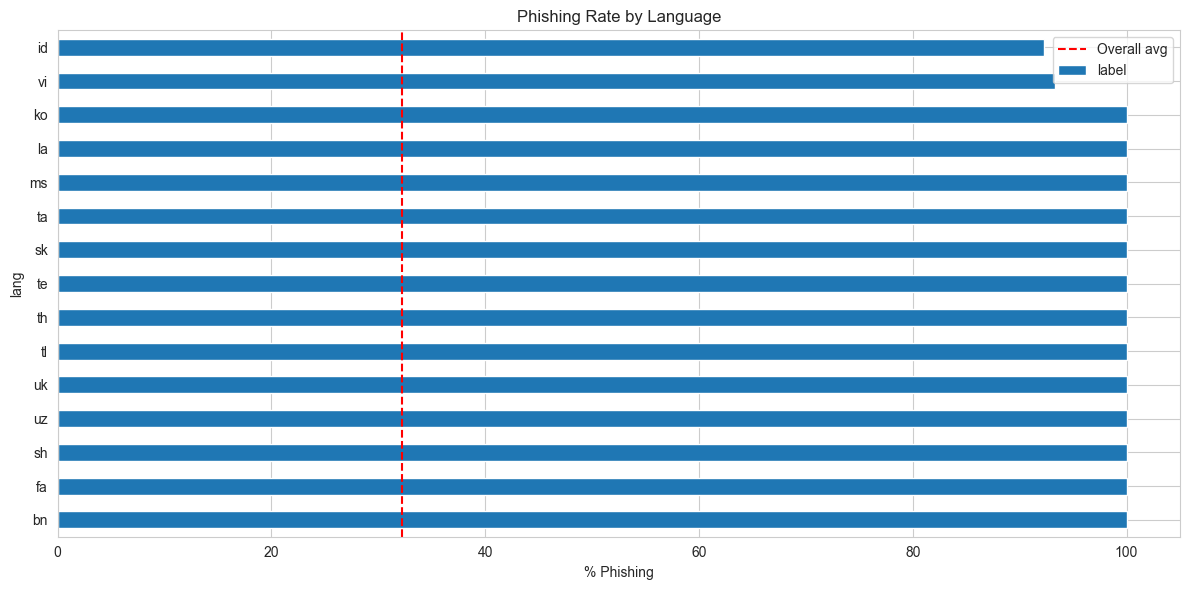

In [2]:
# ============================================
# TEST: Does language correlate with phishing?
# ============================================

print("="*60)
print("LANGUAGE vs PHISHING ANALYSIS")
print("="*60)

# Calculate phishing rate by language
lang_phishing = train_df.groupby('lang')['label'].apply(
    lambda x: (x == 'phish').sum() / len(x) * 100
).sort_values(ascending=False)

print("\n% Phishing by Language (Top 10):")
print(lang_phishing.head(10))

print(f"\n📊 Overall phishing rate: {(train_df['label'] == 'phish').sum() / len(train_df) * 100:.2f}%")

# Check if languages differ significantly
print("\n🔍 Do languages differ from overall rate?")
for lang, rate in lang_phishing.head(10).items():
    overall_rate = (train_df['label'] == 'phish').sum() / len(train_df) * 100
    diff = abs(rate - overall_rate)
    print(f"   {lang}: {rate:.1f}% (diff: {diff:.1f}%)")

# Visualize
plt.figure(figsize=(12, 6))
lang_phishing.head(15).plot(kind='barh')
plt.axvline((train_df['label'] == 'phish').sum() / len(train_df) * 100, 
            color='red', linestyle='--', label='Overall avg')
plt.xlabel('% Phishing')
plt.title('Phishing Rate by Language')
plt.legend()
plt.tight_layout()
plt.show()